## Project 2
Group Members - Raghav Gupta, Peiran Long, Michael Liu

In [1]:

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
# just to check a query 
test_query = 'SELECT SUM(salary) FROM Salaries WHERE teamID = "TOR" AND yearID = 1990'

test = pd.read_sql(test_query,conn)
test

,SUM(salary)
0,17756834.0


# Part 1: Wrangling

### Problem 1

Computed a relation between the total payroll and winning percentage, I used inner join to get rid of missing data. I made sure that I use FLOAT cast typing and also found out the winning rate and payroll for each team every year.

In [3]:
query1 = 'SELECT s.yearID as yearID,s.teamID as teamID,SUM(s.salary) as payroll, CAST(t.W as FLOAT)/CAST(t.G AS FLOAT) * 100 as win_rate FROM Salaries s, Teams t WHERE t.teamID = s.teamID AND t.yearID = s.yearID GROUP BY s.yearID,s.teamID'
df1 = pd.read_sql(query1,conn)
df1.head()

,yearID,teamID,payroll,win_rate
0,1985,ATL,14807000.0,40.740741
1,1985,BAL,11560712.0,51.552795
2,1985,BOS,10897560.0,49.693252
3,1985,CAL,14427894.0,55.555556
4,1985,CHA,9846178.0,52.147239


# Part 2: Exploratory Data Analysis

### Problem 2

plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014)

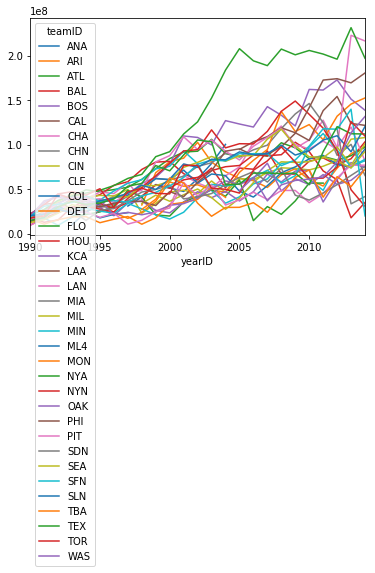

In [4]:
after90 = df1["yearID"] >= 1990
df2 = df1[after90].groupby(['teamID','yearID'])['payroll'].mean()
df2 = df2.unstack(level=0)
df2.plot()

### Question 1

All teams started around the same payroll level, and then gradually(especially after 2000) the spread became bigger indicating that different teams began to use different strategies hiring players to better fit their budget and game plans. Overall, the spending on the payroll across all teams has grown tremendously from 1990 to 2014.

### Problem 3 

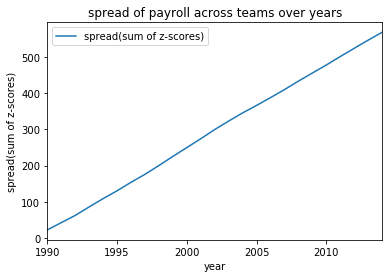

In [5]:
spread = 0
allSpread = []
years = []
for row in range(df2.shape[0]):
    std = df2.iloc[row].std()
    mean = df2.iloc[row].mean()
    for col in range(df2.shape[1]):
        if not math.isnan(df2.iloc[row][col]):
            spread += abs(df2.iloc[row][col] - mean)/std
    allSpread.append(spread)
    years.append(df2.index[row])
    
df3 = pd.DataFrame(allSpread)
df3.index = years
df3.columns = ['spread(sum of z-scores)']
plot3 = df3.plot()
plot3.set_xlabel('year')
plot3.set_ylabel('spread(sum of z-scores)')
plot3.set_title('spread of payroll across teams over years')

This just shows how the payroll increased constantly over the years. This makes sense because of inflation and the industrilization of the game.

## Correlation between payroll and winning percentage

### Problem 4

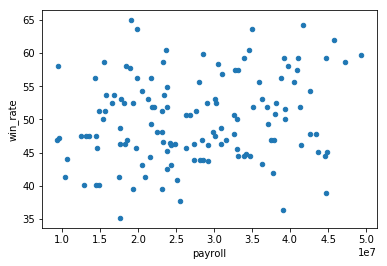

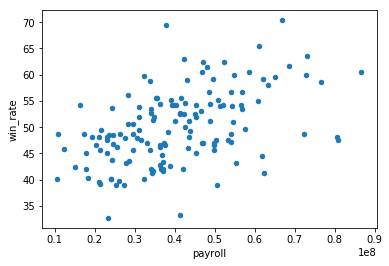

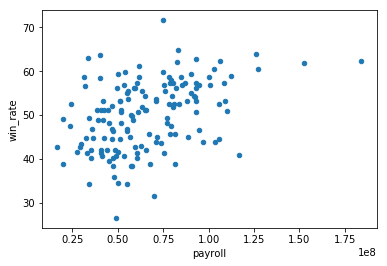

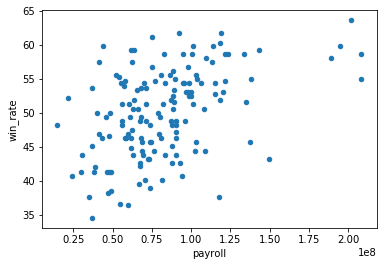

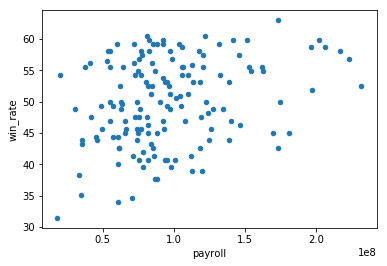

In [6]:
def get_subDf(period):
    temp = df1[after90].copy()
    temp['period'] = pd.cut(temp['yearID'],5,labels = ['first','second','third','forth','fifth'])
    temp2 = pd.DataFrame(list(temp['win_rate'].groupby(temp['period']))[period][1])
    temp2['payroll'] = pd.DataFrame(list(temp['payroll'].groupby(temp['period']))[period][1])['payroll']
    return temp2

plot4_1 = get_subDf(0).plot.scatter('payroll','win_rate')
plot4_2 = get_subDf(1).plot.scatter('payroll','win_rate')
plot4_3 = get_subDf(2).plot.scatter('payroll','win_rate')
plot4_4 = get_subDf(3).plot.scatter('payroll','win_rate')
plot4_5 = get_subDf(4).plot.scatter('payroll','win_rate')

### Question 2

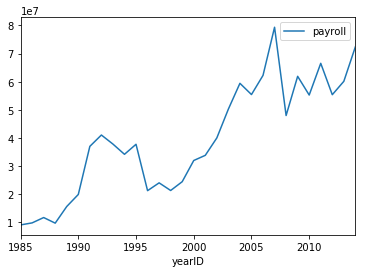

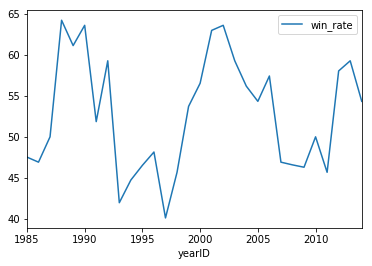

In [7]:
df4 = df1.copy()
df4 = df4[df4['teamID']=='OAK']
plot4_5 = df4.plot('yearID','payroll')
plot4_6 = df4.plot('yearID','win_rate')

# Question 2 # 
The team payrolls is increasing accross these period.
From the scatter plaots,we can see that if payroll is larger, the win_rate is higher.

#team wise

The team NYA is always at the upper-right corner which means for them paying more will get a higher winning rate.
ATL did pretty good on using money efficiently. 

OAK is always locate at the left half of the graph, which means it spent less money however, their winnig rate wasn't compromised on this. Which just proves that, they spent less and won more.

# Part 3: Data transformations

## Standardizing across years

### Problem 5

In [8]:
stats = {}
df5 = df1.copy()
df5 = df5[df5['yearID'] >= 1990]
for row in range(df2.shape[0]):
    std = df2.iloc[row].std()
    mean = df2.iloc[row].mean()
    stats[df2.index[row]]=(std,mean)
df5['zscore'] = 'NaN'
for row in df5.index:
    payroll = df5.get_value(row,'payroll')
    std = stats[df5.get_value(row,'yearID')][0]
    mean = stats[df5.get_value(row,'yearID')][1]
    df5.set_value(row,'zscore',(payroll-mean)/std)
df5

,yearID,teamID,payroll,win_rate,zscore
130,1990,ATL,14555501.0,40.123457,-0.667275
131,1990,BAL,9680084.0,47.204969,-1.95986
132,1990,BOS,20558333.0,54.320988,0.924213
133,1990,CAL,21720000.0,49.382716,1.2322
134,1990,CHA,9491500.0,58.024691,-2.00986
135,1990,CHN,13624000.0,47.530864,-0.914238
136,1990,CIN,14370000.0,56.172840,-0.716456
137,1990,CLE,14487000.0,47.530864,-0.685437
138,1990,DET,17593238.0,48.765432,0.138098
139,1990,HOU,18330000.0,46.296296,0.333431


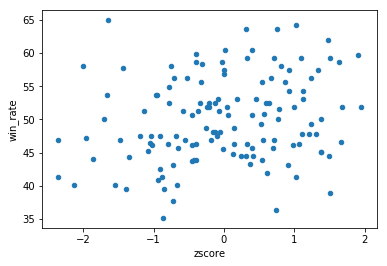

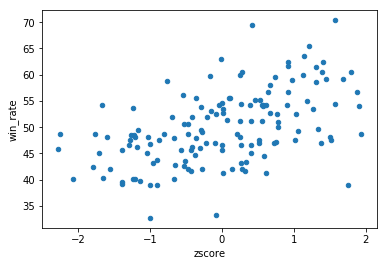

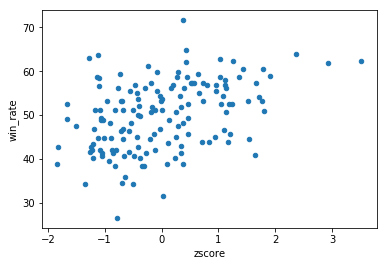

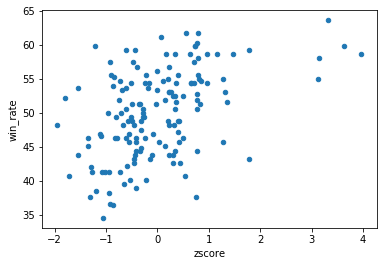

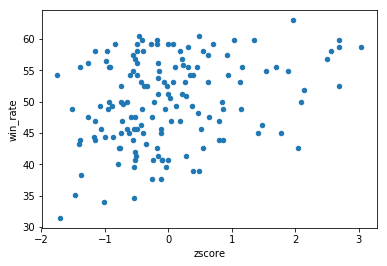

In [10]:
def get_subDf(period):
    temp = df5[df5['yearID'] >= 1990].copy()
    temp['period'] = pd.cut(temp['yearID'],5,labels = ['first','second','third','forth','fifth'])
    temp2 = pd.DataFrame(list(temp['win_rate'].groupby(temp['period']))[period][1])
    temp2['zscore'] = pd.DataFrame(list(temp['zscore'].groupby(temp['period']))[period][1])['zscore']
    return temp2

plot6_1 = get_subDf(0).plot.scatter('zscore','win_rate')
plot6_2 = get_subDf(1).plot.scatter('zscore','win_rate')
plot6_3 = get_subDf(2).plot.scatter('zscore','win_rate')
plot6_4 = get_subDf(3).plot.scatter('zscore','win_rate')
plot6_5 = get_subDf(4).plot.scatter('zscore','win_rate')

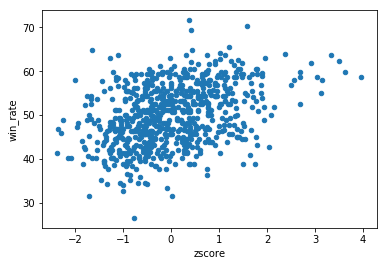

In [11]:
df7 = df5.copy()
df7.plot.scatter('zscore','win_rate')
zscore_data = np.asarray(df7['zscore'].values.astype(float))
win_rate_data = np.asarray(df7['win_rate'].values.astype(float))
reg = np.polyfit(x=zscore_data,y=win_rate_data,deg=1)

## Question 3
The shapes of the plots in problem 6 are not significantly different from those in problem 4. However, in problem 6, with the standardization we can easily compare each value to the mean(a z-score of 0)